In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def support_vector_regression_1d(dataset, C, epsilon=0.1, epochs=100):
    bias = 0.0
    betas = np.zeros(dataset.shape[0])
    count = 0
    numChanged = 0
    isReadyForNewLoop = True
    while ((count<epochs) and (isReadyForNewLoop or (numChanged>0))):
        numChanged = 0
        for i in range(dataset.shape[0]):
            if (isReadyForNewLoop or (np.fabs(betas[i])<C)):
                Ei = np.dot(betas, np.matmul(dataset[:, :-1], dataset[i, :-1]))+bias-dataset[i, -1]
                if (((np.fabs(Ei+epsilon)>0.001) and (betas[i]>=0) and (betas[i]<C)) or \
                    ((np.fabs(Ei-epsilon)>0.001) and (betas[i]>-C) and (betas[i]<=0))):
                    maxDeltaE = 0.0
                    j = -1
                    for _j in range(dataset.shape[0]):
                        if (np.fabs(betas[_j])<0):
                            E = np.dot(betas, np.matmul(dataset[:, :-1], dataset[_j, :-1]))+bias-dataset[_j, -1]
                            deltaE = np.fabs(Ei-E)
                            if (deltaE>maxDeltaE):
                                j = _j
                                maxDeltaE = deltaE
                                Ej = E
                    if (j<0):
                        j = i
                        while (j==i):
                            j = np.random.randint(0, dataset.shape[0])
                        Ej = np.dot(betas, np.matmul(dataset[:, :-1], dataset[j, :-1]))+bias-dataset[j, -1]
                    betaI = betas[i].copy()
                    betaJ = betas[j].copy()
                    eta = 2.0*np.dot(dataset[i, :-1], dataset[j, :-1]) \
                          -np.dot(dataset[i, :-1], dataset[i, :-1]) \
                          -np.dot(dataset[j, :-1], dataset[j, :-1])
                    if (eta>=0):
                        print("eta>=0")
                        continue
                    delta = (Ei-Ej)/eta
                    if (np.fabs(delta) < 0.00001):
                        print("not moving enough")
                        continue
                    betas[j] -= delta
                    if (betas[j]>C):
                        betas[j] = C
                    elif (betas[j]<-C):
                        betas[j] = -C
                    betas[i] += delta
                    if (betas[i]>C):
                        betas[i] = C
                    elif (betas[i]<-C):
                        betas[i] = -C
                    bias1 = bias-Ei-delta*(np.dot(dataset[i, :-1], dataset[i, :-1])-np.dot(dataset[i, :-1], dataset[j, :-1]))
                    bias2 = bias-Ej-delta*(np.dot(dataset[i, :-1], dataset[j, :-1])-np.dot(dataset[j, :-1], dataset[j, :-1]))
                    if (0<betas[i]):
                        bias = bias1-epsilon
                    elif (0>betas[j]):
                        bias = bias2+epsilon
                    else:
                        bias = (bias1 + bias2)/2.0
                    numChanged += 1
        count += 1
        #print(numChanged)
        if isReadyForNewLoop:
            isReadyForNewLoop = False
        elif (numChanged==0):
            isReadyForNewLoop = True
    return bias, betas

-19.59137348735426 [ 12.83058742 263.75514132]
(0, 2)


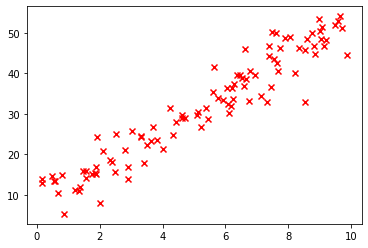

In [3]:
if __name__ == "__main__":
    x = np.random.uniform(0, 10, 100)
    y = 4.5*x+8.1+np.random.normal(0, 4, x.shape[0])
    dataset = np.concatenate((x, y), axis=0)
    dataset = np.reshape(dataset, (100, 2), order="F")
    C = 1.0
    b, betas = support_vector_regression_1d(dataset, C)
    w = np.matmul(betas, dataset[:, :2])
    print(b, w)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataset[:, 0], dataset[:, 1], c="r", marker="x")
    sv = dataset[np.nonzero(np.fabs(betas)<C)]
    print(sv.shape)
    plt.show()